```{admonition} Внимание!
:class: warning
Данная страница инициализирована в статичном режиме – все графики неинтерактивны. При необходимости Вы можете посмотреть [интерактивную копию](RG-3-StressRotation-PrincipleStresses-MohrCircles-Part2-I.md) данной страницы.
```

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Text3D
%matplotlib widget
from ipywidgets import interact, widgets
from sympy import Symbol, Matrix, cos, sin
import sys
sys.path.append('../../SupportCode/')
from Graphics import plot_angle_arc, cube_plane, Arrow3D

<a id='geomech-rg-stress_rotation-2'></a>
# Базис тензора напряжений. Главные напряжения. Круги Мора. Часть 2

Теперь рассмотрим элементарный объем в трехмерном пространстве. Для этого необходимо составить матрицу перехода от стандартного базиса к базису, повернутому на некоторые углы в трехмерном пространстве. Рассматривать вращения будем вокруг каждой из осей: $x, y, z$. Углы вращения соответственно: $\gamma, \beta, \alpha$. Вращение вокруг оси $z$ уже было рассмотрено. Система уравнений для трехмерного случая имеет вид:

$$\left\{\begin{array} \\ \sigma_{1'} = \sigma_1 \cdot \cos{\alpha} + \sigma_2 \cdot \sin{\alpha} \\ \sigma_{2'} = -\sigma_1 \cdot \sin{\alpha} + \sigma_2 \cdot \cos{\alpha} \\ \sigma_{3'} = \sigma_{3}  \end{array} \right.$$

Матричная запись данной системы уравнений:

$$\begin{bmatrix} \sigma_{1'} \\ \sigma_{2'} \\ \sigma_{3'} \end{bmatrix} = \begin{bmatrix} \cos{\alpha} & \sin{\alpha} & 0 \\ -\sin{\alpha} & \cos{\alpha} & 0 \\ 0 & 0 & 1 \end{bmatrix} \cdot \begin{bmatrix} \sigma_{1} \\ \sigma_{2} \\ \sigma_{3} \end{bmatrix}$$

Таким образом, матрица

$$Q_z = \begin{bmatrix} \cos{\alpha} & \sin{\alpha} & 0 \\ -\sin{\alpha} & \cos{\alpha} & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

является матрицей вращения напряжений вокруг оси $z$ в трехмерном пространстве.

Рассмотрим вращение вокруг оси $y$, направленной на читателя на рисунке ниже.

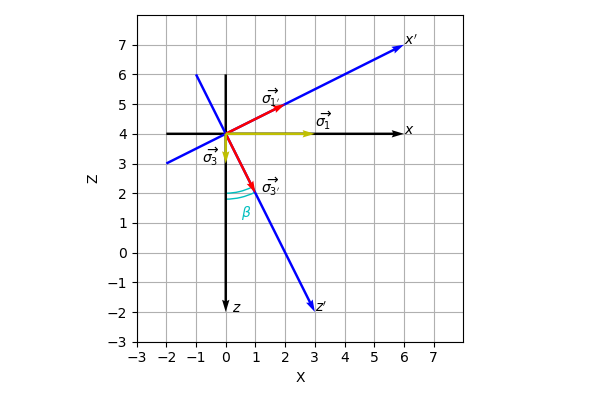

In [2]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.canvas.header_visible = False

x0 = [-2, 0, -2, -1, 0, 0, 0, 0]
y0 = [4, 6, 3, 6, 4, 4, 4, 4]

U = [[8, 0, 8, 4, 2, 1, 3, 0]]
V = [[0, -8, 4, -8, 1, -2, 0, -1]]

plot_angle_arc(ax, 0, 4, -90, -90 + np.rad2deg(np.arctan(0.5)), 4.0, 2, color='c')

ax.quiver(x0, y0, U, V, scale=1, angles='xy', scale_units='xy', color=['k', 'k', 'b', 'b', 'r', 'r', 'y', 'y'], zorder=3)

ax.text(6, 4, '$x$')
ax.text(0.2, -2, '$z$')
ax.text(6, 7, '$x\'$')
ax.text(3, -2, '$z\'$')
ax.text(1.2, 5, '$\\overrightarrow{\\sigma_{1\'}}$')
ax.text(3, 4.2, '$\\overrightarrow{\\sigma_{1}}$')
ax.text(1.2, 2, '$\\overrightarrow{\\sigma_{3\'}}$')
ax.text(-0.8, 3, '$\\overrightarrow{\\sigma_{3}}$')
ax.text(0.5, 1.2, '$\\beta$', c='c')

ax.set_xlim(-3, 8)
ax.set_ylim(-3, 8)
ax.set_xticks(range(-3, 8))
ax.set_yticks(range(-3, 8))
ax.set_aspect('equal', adjustable='box')
ax.set_axisbelow(True)
ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Z')

fig.tight_layout()

С учетом принципа вращения напряжений получим следующую систему уравнений:

$$\left\{\begin{array} \\ \sigma_{1'} = \sigma_1 \cdot \cos{\beta} - \sigma_3 \cdot \sin{\beta} \\ \sigma_{2'} = \sigma_2 \\ \sigma_{3'} = \sigma_1 \cdot \sin{\beta} + \sigma_3 \cdot \cos{\beta} \end{array} \right.$$

Данная система уравнений в матричной форме:

$$\begin{bmatrix}\sigma_{1'} \\ \sigma_{2'} \\ \sigma_{3'} \end{bmatrix} = \begin{bmatrix} \cos{\beta} & 0 & -\sin{\beta} \\ 0 & 1 & 0 \\ \sin{\beta} & 0 & \cos{\beta} \end{bmatrix} \cdot \begin{bmatrix}\sigma_1 \\ \sigma_2 \\ \sigma_3 \end{bmatrix}$$

Таким образом, матрица

$$Q_y = \begin{bmatrix} \cos{\beta} & 0 & -\sin{\beta} \\ 0 & 1 & 0 \\ \sin{\beta} & 0 & \cos{\beta} \end{bmatrix}$$

является матрицей вращения напряжений вокруг оси $y$.

Рассмотрим вращение вокруг оси $x$, направленной от читателя на рисунке ниже.

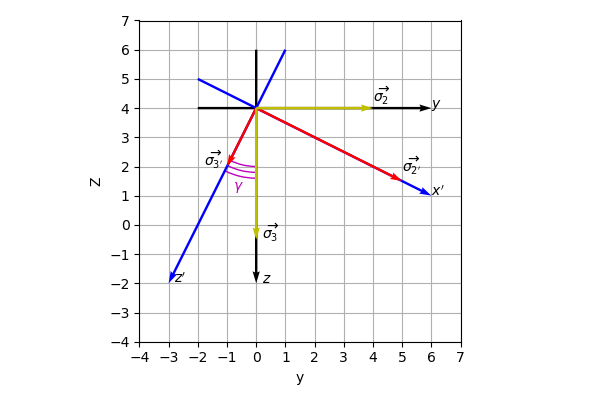

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.canvas.header_visible = False

x0 = [-2, 0, -2, 1, 0, 0, 0, 0]
y0 = [4, 6, 5, 6, 4, 4, 4, 4]

U = [[8, 0, 8, -4, 5, -1, 4, 0]]
V = [[0, -8, -4, -8, -2.5, -2, 0, -4.5]]

plot_angle_arc(ax, 0, 4, -90 - np.rad2deg(np.arctan(0.5)), -90, 4.0, 3, color='m')

ax.quiver(x0, y0, U, V, scale=1, angles='xy', scale_units='xy', color=['k', 'k', 'b', 'b', 'r', 'r', 'y', 'y'], zorder=3)

ax.text(6, 4, '$y$')
ax.text(0.2, -2, '$z$')
ax.text(6, 1, '$x\'$')
ax.text(-2.8, -2, '$z\'$')
ax.text(5, 1.8, '$\\overrightarrow{\\sigma_{2\'}}$')
ax.text(4, 4.2, '$\\overrightarrow{\\sigma_{2}}$')
ax.text(-1.8, 2, '$\\overrightarrow{\\sigma_{3\'}}$')
ax.text(0.2, -0.5, '$\\overrightarrow{\\sigma_{3}}$')
ax.text(-0.8, 1.2, '$\\gamma$', c='m')

ax.set_xlim(-4, 7)
ax.set_ylim(-4, 7)
ax.set_xticks(range(-4, 8))
ax.set_yticks(range(-4, 8))
ax.set_aspect('equal', adjustable='box')
ax.set_axisbelow(True)
ax.grid()
ax.set_xlabel('y')
ax.set_ylabel('Z')

fig.tight_layout()

С учетом принципа вращения напряжений получим следующую систему уравнений:

$$\left\{\begin{array} \\ \sigma_{1'} = \sigma_1 \\ \sigma_{2'} = \sigma_2 \cdot \cos{\gamma} + \sigma_3 \cdot \sin{\gamma} \\ \sigma_{3'} = -\sigma_2 \cdot \sin{\gamma} + \sigma_3 \cdot \cos{\gamma} \end{array} \right.$$

Данная система уравнений в матричной форме:

$$\begin{bmatrix}\sigma_{1'} \\ \sigma_{2'} \\ \sigma_{3'} \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos{\gamma} & \sin{\gamma} \\ 0 & -\sin{\gamma} & \cos{\gamma} \end{bmatrix} \cdot \begin{bmatrix}\sigma_1 \\ \sigma_2 \\ \sigma_3 \end{bmatrix}$$

Таким образом, матрица

$$Q_x = \begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos{\gamma} & \sin{\gamma} \\ 0 & -\sin{\gamma} & \cos{\gamma} \end{bmatrix}$$

является матрицей вращения напряжений вокруг оси $x$.

Итоговая матрица преобразования в трехмерном пространстве:

$$Q = Q_x \cdot Q_y \cdot Q_z$$

In [4]:
alpha = Symbol('alpha')
beta = Symbol('beta')
gamma = Symbol('gamma')
Qx = Matrix([[1, 0, 0], [0, cos(gamma), sin(gamma)], [0, -sin(gamma), cos(gamma)]])
Qy = Matrix([[cos(beta), 0, -sin(beta)], [0, 1, 0], [sin(beta), 0, cos(beta)]])
Qz = Matrix([[cos(alpha), sin(alpha), 0], [-sin(alpha), cos(alpha), 0], [0, 0, 1]])
Qx * Qy * Qz

Matrix([
[                                    cos(alpha)*cos(beta),                                    sin(alpha)*cos(beta),           -sin(beta)],
[-sin(alpha)*cos(gamma) + sin(beta)*sin(gamma)*cos(alpha), sin(alpha)*sin(beta)*sin(gamma) + cos(alpha)*cos(gamma), sin(gamma)*cos(beta)],
[ sin(alpha)*sin(gamma) + sin(beta)*cos(alpha)*cos(gamma), sin(alpha)*sin(beta)*cos(gamma) - sin(gamma)*cos(alpha), cos(beta)*cos(gamma)]])

Рассмотрим пример. Пусть напряженное состояние в некоторой точке трехмерного пространства представлено следующим тензором в стандартном базисе:

$$S = \begin{bmatrix} 2 & 1 & 0 \\ 1 & 3 & -2 \\ 0 & -2 & 1 \end{bmatrix}$$

Необходимо найти тензор напряженного состояния при повороте стандартного базиса на угол: $\beta = \frac{\pi}{4}$, то есть вокруг оси $y$.

Для начала убедимся, что при нулевых значениях углов в результате перехода к новому базису мы получаем исходную матрицу.

In [5]:
S = np.array([[2, 1, 0], [1, 3, -2], [0, -2, 1]])

def stress_rotation_matrix_3d(a, b, g):
    Qx = np.array([[1, 0, 0], [0, np.cos(g), np.sin(g)], [0, -np.sin(g), np.cos(g)]])
    Qy = np.array([[np.cos(b), 0, -np.sin(b)], [0, 1, 0], [np.sin(b), 0, np.cos(b)]])
    Qz = np.array([[np.cos(a), np.sin(a), 0], [-np.sin(a), np.cos(a), 0], [0, 0, 1]])
    return Qx.dot(Qy).dot(Qz)

Q = stress_rotation_matrix_3d(0, 0, 0)
Q.dot(S).dot(np.linalg.inv(Q))

array([[ 2.,  1.,  0.],
       [ 1.,  3., -2.],
       [ 0., -2.,  1.]])

In [6]:
Q = stress_rotation_matrix_3d(0, np.pi/4, 0)
Q.dot(S).dot(np.linalg.inv(Q))

array([[ 1.5       ,  2.12132034,  0.5       ],
       [ 2.12132034,  3.        , -0.70710678],
       [ 0.5       , -0.70710678,  1.5       ]])

Ниже представлена интерактивная диаграмма для определения напряженного состояния в трехмерном пространстве для любых значений углов поворота вокруг каждой из трех осей.

interactive(children=(IntSlider(value=0, description='alpha', max=360), IntSlider(value=0, description='beta',…

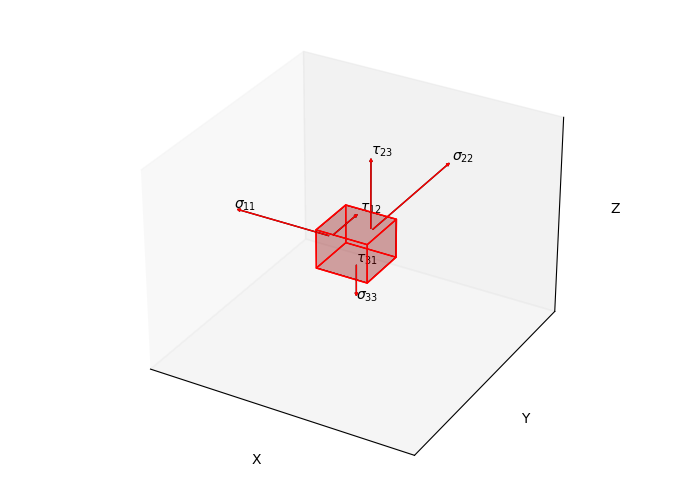

In [7]:
fig = plt.figure(figsize=(7, 5))
fig.canvas.header_visible = False
ax = fig.add_subplot(1, 1, 1, projection='3d')
S = np.array([[2, 1, 0], [1, 3, -2], [0, -2, 1]])
[[s11, s12, s13], [s21, s22, s23], [s31, s32, s33]] = S
unit_cube = cube_plane(1, 1, 1, alpha=0.1, linewidths=0.4, equal_scale=True)
s11_arr = Arrow3D([0.5, 0.5+s11], [0, 0], [0, 0], color='k', lw=1, mutation_scale=4)
s22_arr = Arrow3D([0, 0], [0.5, 0.5+s22], [0, 0], color='k', lw=1, mutation_scale=4)
s33_arr = Arrow3D([0, 0], [0, 0], [0.5, 0.5+s33], color='k', lw=1, mutation_scale=4)
s12_arr = Arrow3D([0.5, 0.5], [0, s12], [0, 0], color='k', lw=1, mutation_scale=4)
s23_arr = Arrow3D([0, 0], [0.5, 0.5], [0, s23], color='k', lw=1, mutation_scale=4)
s31_arr = Arrow3D([0, s31], [0, 0], [0.5, 0.5], color='k', lw=1, mutation_scale=4)
ax.set_xlim(unit_cube.xlim)
ax.set_ylim(unit_cube.ylim)
ax.set_zlim(unit_cube.zlim)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.invert_zaxis()
ax.invert_xaxis()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.tight_layout()
removing1 = [Text3D, Poly3DCollection, Arrow3D]
@interact(alpha=widgets.IntSlider(min=0, max=360, step=1, value=0), beta=widgets.IntSlider(min=0, max=360, step=1, value=0), gamma=widgets.IntSlider(min=0, max=360, step=1, value=0))
def rotation_3d(alpha, beta, gamma):
    for child in ax.get_children():
        if type(child) in removing1:
            try:
                child.remove()
            except:
                pass
    alpha, beta, gamma = alpha * np.pi / 180, beta * np.pi / 180, gamma * np.pi / 180
    ax.add_collection3d(unit_cube.cube_collection())
    for art in [s11_arr, s22_arr, s33_arr, s12_arr, s23_arr, s31_arr]:
        ax.add_artist(art)
    rot_cube = cube_plane(1.01, 1.01, 1.01, rotation_angles=(alpha, beta, gamma), facecolors='r', edgecolors='r', alpha=0.1)
    rot_m = rot_cube.rotation_matrix()
    ax.add_collection3d(rot_cube.cube_collection())
    Q = stress_rotation_matrix_3d(alpha, beta, gamma)
    S_rotation = Q.dot(S).dot(np.linalg.inv(Q))
    [[s11_rot, s12_rot, s13_rot], [s21_rot, s22_rot, s23_rot], [s31_rot, s32_rot, s33_rot]] = S_rotation
    ax.add_artist(Arrow3D([0.5, 0.5+s11_rot], [0, 0], [0, 0], color='r', lw=1, mutation_scale=4, rotation_angles=(alpha, beta, gamma)))
    ax.add_artist(Arrow3D([0, 0], [0.5, 0.5+s22_rot], [0, 0], color='r', lw=1, mutation_scale=4, rotation_angles=(alpha, beta, gamma)))
    ax.add_artist(Arrow3D([0, 0], [0, 0], [0.5, 0.5+s33_rot], color='r', lw=1, mutation_scale=4, rotation_angles=(alpha, beta, gamma)))
    ax.add_artist(Arrow3D([0.5, 0.5], [0, s12_rot], [0, 0], color='r', lw=1, mutation_scale=4, rotation_angles=(alpha, beta, gamma)))
    ax.add_artist(Arrow3D([0, 0], [0.5, 0.5], [0, s23_rot], color='r', lw=1, mutation_scale=4, rotation_angles=(alpha, beta, gamma)))
    ax.add_artist(Arrow3D([0, s31_rot], [0, 0], [0.5, 0.5], color='r', lw=1, mutation_scale=4, rotation_angles=(alpha, beta, gamma)))
    ax.text(*rot_m.dot(np.array([0.5+s11_rot, 0, 0])), '$\\sigma_{11}$')
    ax.text(*rot_m.dot(np.array([0, 0.5+s22_rot, 0])), '$\\sigma_{22}$')
    ax.text(*rot_m.dot(np.array([0, 0, 0.5+s33_rot])), '$\\sigma_{33}$')
    ax.text(*rot_m.dot(np.array([0.5, s12_rot, 0])), '$\\tau_{12}$')
    ax.text(*rot_m.dot(np.array([0, 0.5, s23_rot])), '$\\tau_{23}$')
    ax.text(*rot_m.dot(np.array([s31_rot, 0, 0.5])), '$\\tau_{31}$')
    pass

С использованием данной диаграммы решается задача преобразования известного тензора напряжений при повороте элементарного объема из условия постоянства напряженного состония. Иными словами, при любых значениях углов поворота значение вектора напряжения остается неизменным.

Отображение напряженного состояния с использованием кругов Мора для трехмерного базиса будет рассмотрено в [следующем разделе](RG-3-StressRotation-PrincipleStresses-MohrCircles-Part3.md).